In [18]:
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import xarray as xr
import re
import os
from itertools import product
import torch

from util import load_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
corr_N100 = load_data("/scratch/users/yucli/ap229_langevin/N100_second_exp", var='correlation')
corr_N1000 = load_data("/scratch/users/yucli/ap229_langevin/N1000_continued", var='correlation')

/home/users/yucli/ap229/ap229-final-project/util.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(output_dir, fname))[var].numpy()


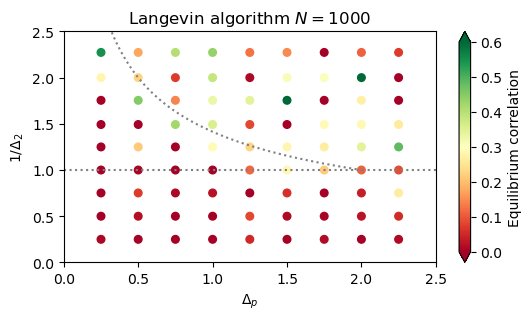

In [41]:
equilibrium_corr = corr_N1000.mean("trial").isel(step=slice(-2000, -1)).mean("step")
y = 1 / equilibrium_corr.delta2
x = equilibrium_corr.deltap.values
z = equilibrium_corr.values

X, Y = np.meshgrid(x, y)

# Flatten for scatter
plt.figure(figsize=(6, 3))
plt.scatter(X.flatten(), Y.flatten(), c=z.flatten(), s=30, vmin=0, vmax=0.6, cmap='RdYlGn')
plt.xlabel(rf"$\Delta_p$")
plt.ylabel(rf"$1/\Delta_2$")
plt.xlim([0,2.5])
plt.ylim([0,2.5])

# Plot y = sqrt(x/2)
x_line = np.linspace(x.min(), 2, 500)
y_sqrt = np.sqrt(2 / x_line)
plt.plot(x_line, y_sqrt, color='gray', linestyle=':', label=r"$y = \sqrt{2/x}$")

# Plot y = 1
plt.axhline(y=1, color='gray', linestyle=':', label=r"$y = 1$")

plt.colorbar(label="Equilibrium correlation", extend='both')
plt.title(rf"Langevin algorithm $N = 1000$")
plt.savefig("figures/langevin_N1000_phase_diag_empirical.png", dpi=300, bbox_inches='tight')


### Langevin converges to "global spin-flipped" configurations in easy regime 

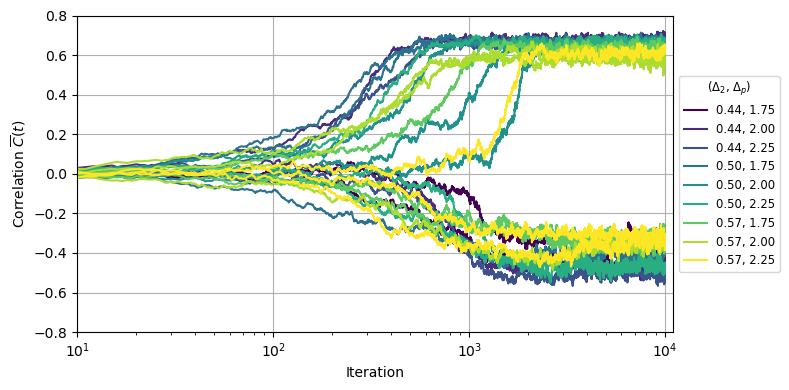

In [40]:
plt.figure(figsize=(8,4))

easy_subset = corr_N1000.isel(delta2=slice(0,3), deltap=slice(6,9))
delta2_vals = easy_subset.delta2.values
deltap_vals = easy_subset.deltap.values

# Create a list of all (delta2, deltap) combinations
combinations = list(product(delta2_vals, deltap_vals))

# Sample 9 colors from a colormap
cmap = plt.get_cmap('viridis')
colors = [cmap(i / (len(combinations) - 1)) for i in range(len(combinations))]

# Plot each trial with corresponding color
for idx, (delta2, deltap) in enumerate(combinations):
    for i in range(3):  # 3 trials per combination
        y = easy_subset.sel(delta2=delta2, deltap=deltap, trial=i)
        plt.plot(y.step, y, color=colors[idx], label=f"{delta2:.2f}, {deltap:.2f}" if i == 0 else None)

# Optional: only one legend entry per (delta2, deltap) pair
plt.legend(
    title=r"($\Delta_2$, $\Delta_p$)", fontsize='small', title_fontsize='small',
    bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0
)
plt.xlabel("Iteration")
plt.ylabel(r"Correlation $\overline{C}(t)$")
plt.xscale("log")
plt.xlim(10, 1e4 + 1e3)
plt.ylim(-0.8, 0.8)
plt.grid()
plt.tight_layout()
plt.savefig("figures/langevin_N1000_spin_flip_symmetry.svg", bbox_inches='tight')

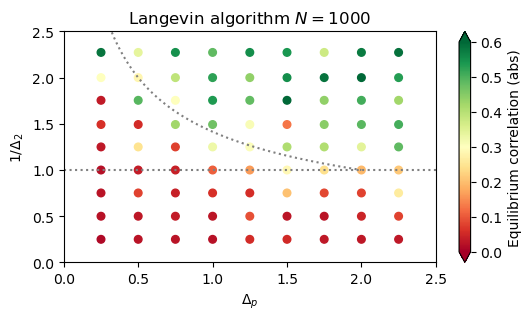

In [42]:
equilibrium_corr = np.abs(corr_N1000).mean("trial").isel(step=slice(-2000, -1)).mean("step")
y = 1 / equilibrium_corr.delta2
x = equilibrium_corr.deltap.values
z = equilibrium_corr.values

X, Y = np.meshgrid(x, y)

# Flatten for scatter
plt.figure(figsize=(6, 3))
plt.scatter(X.flatten(), Y.flatten(), c=z.flatten(), s=30, vmin=0, vmax=0.6, cmap='RdYlGn')
plt.xlabel(rf"$\Delta_p$")
plt.ylabel(rf"$1/\Delta_2$")
plt.xlim([0,2.5])
plt.ylim([0,2.5])

# Plot y = sqrt(x/2)
x_line = np.linspace(x.min(), 2, 500)
y_sqrt = np.sqrt(2 / x_line)
plt.plot(x_line, y_sqrt, color='gray', linestyle=':', label=r"$y = \sqrt{2/x}$")

# Plot y = 1
plt.axhline(y=1, color='gray', linestyle=':', label=r"$y = 1$")

plt.colorbar(label="Equilibrium correlation (abs)", extend='both')
plt.title(rf"Langevin algorithm $N = 1000$")
plt.savefig("figures/langevin_N1000_phase_diag_empirical_abs.png", dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Langevin algorithm $N = 100$')

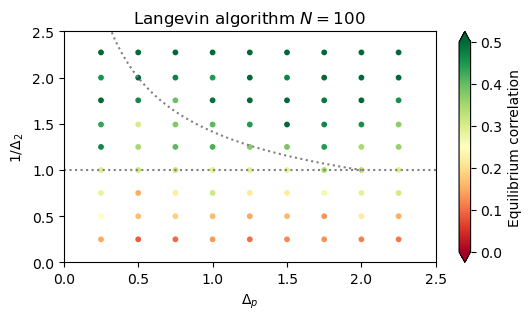

In [13]:
equilibrium_corr = np.abs(corr_N100).mean("trial").isel(step=slice(-2000, -1)).mean("step")
y = 1 / equilibrium_corr.delta2
x = equilibrium_corr.deltap.values
z = equilibrium_corr.values

X, Y = np.meshgrid(x, y)

# Flatten for scatter
plt.figure(figsize=(6, 3))
plt.scatter(X.flatten(), Y.flatten(), c=z.flatten(), s=10, vmin=0, vmax=0.5, cmap='RdYlGn')
plt.xlabel(rf"$\Delta_p$")
plt.ylabel(rf"$1/\Delta_2$")
plt.xlim([0,2.5])
plt.ylim([0,2.5])

# Plot y = sqrt(x/2)
x_line = np.linspace(x.min(), 2, 500)
y_sqrt = np.sqrt(2 / x_line)
plt.plot(x_line, y_sqrt, color='gray', linestyle=':', label=r"$y = \sqrt{2/x}$")

# Plot y = 1
plt.axhline(y=1, color='gray', linestyle=':', label=r"$y = 1$")

plt.colorbar(label="Equilibrium correlation", extend='both')
plt.title(rf"Langevin algorithm $N = 100$")
#plt.savefig("figures/langevin_N100_phase_diag_empirical.jpg", dpi=300, bbox_inches='tight')


/tmp/ipykernel_107378/3994882502.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Greys')(np.linspace(0.2, 0.9, 7))


Text(0.5, 1.0, 'Langevin algorithm correlation for $\\Delta_2 = 0.67$')

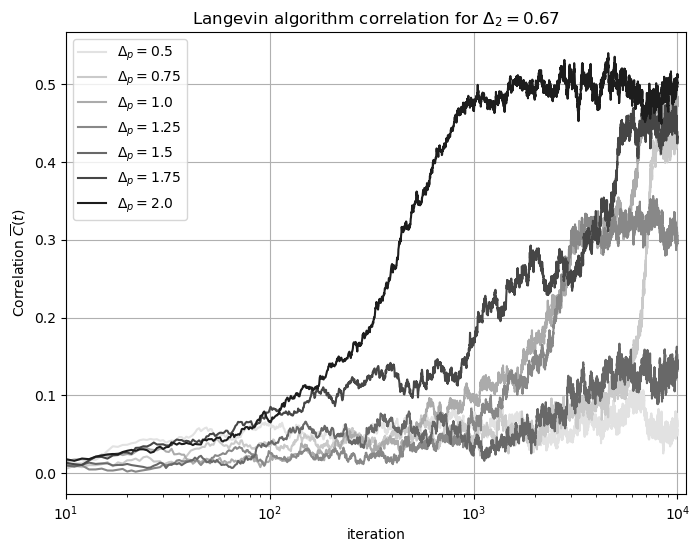

In [43]:
from matplotlib import cm
colors = cm.get_cmap('Greys')(np.linspace(0.2, 0.9, 7))

data_subset = np.abs(corr_N1000).sel(delta2=0.67, deltap=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]).mean("trial")

plt.figure(figsize=(8, 6))
for i in range(len(data_subset.deltap)):
    deltap = data_subset.deltap[i].values
    plt.plot(data_subset.isel(deltap=i), color=colors[i],
            label=rf'$\Delta_p = {deltap}$')

plt.legend()
plt.xscale("log")
plt.xlim(10, 11000)
plt.grid()
plt.xlabel("iteration")
plt.ylabel(r"Correlation $\overline{C}(t)$")
plt.title(r"Langevin algorithm correlation for $\Delta_2 = 0.67$")
#plt.savefig("figures/langevin_N1000_correlation_empirical.jpg", dpi=300, bbox_inches='tight')

In [2]:
#corr_N100 = load_data("/scratch/users/yucli/ap229_langevin/N100_second_exp")
traj_N1000 = load_data("/scratch/users/yucli/ap229_langevin/N1000", var='trajectory')

/home/users/yucli/ap229/ap229-final-project/util.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(output_dir, fname))[var].numpy()


<xarray.DataArray (trial: 3, delta2: 9, deltap: 9, step: 10001, i: 1000)> Size: 19GB
array([[[[[ 9.69994068e-02,  8.44203472e-01,  4.21154290e-01, ...,
           -5.65656662e-01, -4.22330141e-01,  4.72510785e-01],
          [ 1.41171873e-01,  9.14967060e-01,  4.17865306e-01, ...,
           -4.30427194e-01, -2.18891859e-01,  5.17709553e-01],
          [ 3.23248804e-01,  9.70762730e-01,  2.39202350e-01, ...,
           -5.82930207e-01,  1.96910679e-01,  6.54205322e-01],
          ...,
          [-2.28551412e+00,  1.62774062e+00, -4.28823419e-02, ...,
            7.33423233e-01, -1.64003170e+00, -3.56976360e-01],
          [-2.34386158e+00,  1.73969424e+00, -1.10257104e-01, ...,
            8.37655962e-01, -1.71149635e+00, -2.74340808e-01],
          [-2.15814447e+00,  1.77146339e+00, -7.64505193e-02, ...,
            9.08904016e-01, -1.72985792e+00, -1.84598520e-01]],

         [[ 1.42109072e+00,  2.02400327e-01, -1.73205853e+00, ...,
           -8.44407618e-01,  5.03058016e-01,  5.47927558e-01],
          [ 1.44110286e+00,  4.70070809e-01, -1.40709496e+00, ...,
           -8.34819317e-01,  3.57682586e-01,  4.77953851e-01],
          [ 1.41441691e+00,  7.71725059e-01, -1.27052343e+00, ...,
           -4.84629780e-01,  2.27419704e-01,  4.73463714e-01],
...
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]],

         [[            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]]]]])
Coordinates:
  * trial    (trial) int64 24B 0 1 2
  * delta2   (delta2) float64 72B 0.44 0.5 0.57 0.67 0.8 1.0 1.33 2.0 4.0
  * deltap   (deltap) float64 72B 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0 2.25
  * step     (step) int64 80kB 0 1 2 3 4 5 6 ... 9995 9996 9997 9998 9999 10000
  * i        (i) int64 8kB 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999